In [1]:
# Technical analysis Exercise
# Check: https://github.com/matplotlib/mplfinance#usage
# https://github.com/matplotlib/mplfinance/blob/master/examples/customization_and_styles.ipynb

from pandas_datareader import data as wb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib.dates as mpl_dates

%matplotlib inline

In [2]:
# Get the stock data
daily = pd.DataFrame()
daily = wb.DataReader("NOVO-B.CO", data_source='yahoo', start='2020-2-25', end='2020-4-27')

# Take a look at the data

print(daily.head())

                  High         Low        Open       Close     Volume  \
Date                                                                    
2020-02-25  431.850006  418.850006  425.000000  421.799988  2839006.0   
2020-02-26  423.200012  401.049988  417.100006  420.450012  3703018.0   
2020-02-27  424.250000  409.350006  417.600006  412.500000  3088376.0   
2020-02-28  406.700012  391.299988  405.000000  395.799988  4265609.0   
2020-03-02  413.799988  397.200012  405.299988  402.850006  3685063.0   

             Adj Close  
Date                    
2020-02-25  415.923340  
2020-02-26  414.592194  
2020-02-27  406.752930  
2020-02-28  390.285583  
2020-03-02  397.237396  


In [3]:
daily.index.name = 'Date'

In [4]:
mpf.available_styles()

['blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

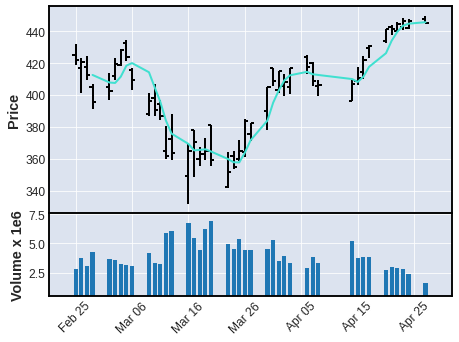

In [5]:
mpf.plot(daily, type='ohlc', mav=4, volume=True, show_nontrading=True, style='default')

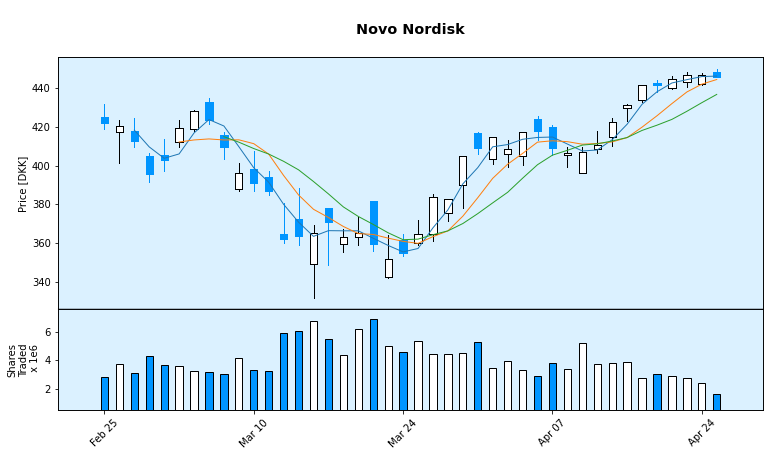

In [6]:
mpf.plot(daily,
         type='candle',
         mav=(3,6,9), 
         volume=True, 
         show_nontrading=False,
         style='blueskies',
         title='\nNovo Nordisk',
         ylabel='Price [DKK]',
         ylabel_lower='Shares\nTraded',
         figratio=(20,10),
         figscale=0.7) # other styles='charles'

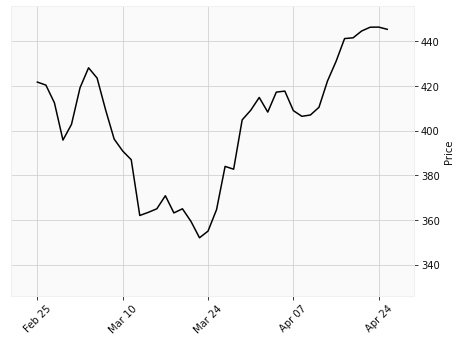

In [7]:
mpf.plot(daily,type='line', style='yahoo')

# Finding Patterns

In [8]:
# https://medium.com/analytics-vidhya/recognizing-over-50-candlestick-patterns-with-python-4f02a1822cb5
import talib

In [9]:
candle_names = talib.get_function_groups()['Pattern Recognition']

In [10]:
print(candle_names)

['CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS', 'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHOLD', 'CDLBREAKAWAY', 'CDLCLOSINGMARUBOZU', 'CDLCONCEALBABYSWALL', 'CDLCOUNTERATTACK', 'CDLDARKCLOUDCOVER', 'CDLDOJI', 'CDLDOJISTAR', 'CDLDRAGONFLYDOJI', 'CDLENGULFING', 'CDLEVENINGDOJISTAR', 'CDLEVENINGSTAR', 'CDLGAPSIDESIDEWHITE', 'CDLGRAVESTONEDOJI', 'CDLHAMMER', 'CDLHANGINGMAN', 'CDLHARAMI', 'CDLHARAMICROSS', 'CDLHIGHWAVE', 'CDLHIKKAKE', 'CDLHIKKAKEMOD', 'CDLHOMINGPIGEON', 'CDLIDENTICAL3CROWS', 'CDLINNECK', 'CDLINVERTEDHAMMER', 'CDLKICKING', 'CDLKICKINGBYLENGTH', 'CDLLADDERBOTTOM', 'CDLLONGLEGGEDDOJI', 'CDLLONGLINE', 'CDLMARUBOZU', 'CDLMATCHINGLOW', 'CDLMATHOLD', 'CDLMORNINGDOJISTAR', 'CDLMORNINGSTAR', 'CDLONNECK', 'CDLPIERCING', 'CDLRICKSHAWMAN', 'CDLRISEFALL3METHODS', 'CDLSEPARATINGLINES', 'CDLSHOOTINGSTAR', 'CDLSHORTLINE', 'CDLSPINNINGTOP', 'CDLSTALLEDPATTERN', 'CDLSTICKSANDWICH', 'CDLTAKURI', 'CDLTASUKIGAP', 'CDL

In [11]:
# extract OHLC (Open, High, Low, Close)
op = daily['Open']
hi = daily['High']
lo = daily['Low']
cl = daily['Close']

In [12]:
# create columns for each pattern
for candle in candle_names:
    # below is same as;
    # df["CDL3LINESTRIKE"] = talib.CDL3LINESTRIKE(op, hi, lo, cl)
    daily[candle] = getattr(talib, candle)(op, hi, lo, cl)

In [13]:
daily.head()

,High,Low,Open,Close,Volume,Adj Close,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,...,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-25,431.850006,418.850006,425.000000,421.799988,2839006.0,415.923340,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-26,423.200012,401.049988,417.100006,420.450012,3703018.0,414.592194,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-27,424.250000,409.350006,417.600006,412.500000,3088376.0,406.752930,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-28,406.700012,391.299988,405.000000,395.799988,4265609.0,390.285583,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-02,413.799988,397.200012,405.299988,402.850006,3685063.0,397.237396,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# https://github.com/CanerIrfanoglu/medium/blob/master/candle_stick_recognition/candle_rankings.py
candle_rankings = {
        "CDL3LINESTRIKE_Bull": 1,
        "CDL3LINESTRIKE_Bear": 2,
        "CDL3BLACKCROWS_Bull": 3,
        "CDL3BLACKCROWS_Bear": 3,
        "CDLEVENINGSTAR_Bull": 4,
        "CDLEVENINGSTAR_Bear": 4,
        "CDLTASUKIGAP_Bull": 5,
        "CDLTASUKIGAP_Bear": 5,
        "CDLINVERTEDHAMMER_Bull": 6,
        "CDLINVERTEDHAMMER_Bear": 6,
        "CDLMATCHINGLOW_Bull": 7,
        "CDLMATCHINGLOW_Bear": 7,
        "CDLABANDONEDBABY_Bull": 8,
        "CDLABANDONEDBABY_Bear": 8,
        "CDLBREAKAWAY_Bull": 10,
        "CDLBREAKAWAY_Bear": 10,
        "CDLMORNINGSTAR_Bull": 12,
        "CDLMORNINGSTAR_Bear": 12,
        "CDLPIERCING_Bull": 13,
        "CDLPIERCING_Bear": 13,
        "CDLSTICKSANDWICH_Bull": 14,
        "CDLSTICKSANDWICH_Bear": 14,
        "CDLTHRUSTING_Bull": 15,
        "CDLTHRUSTING_Bear": 15,
        "CDLINNECK_Bull": 17,
        "CDLINNECK_Bear": 17,
        "CDL3INSIDE_Bull": 20,
        "CDL3INSIDE_Bear": 56,
        "CDLHOMINGPIGEON_Bull": 21,
        "CDLHOMINGPIGEON_Bear": 21,
        "CDLDARKCLOUDCOVER_Bull": 22,
        "CDLDARKCLOUDCOVER_Bear": 22,
        "CDLIDENTICAL3CROWS_Bull": 24,
        "CDLIDENTICAL3CROWS_Bear": 24,
        "CDLMORNINGDOJISTAR_Bull": 25,
        "CDLMORNINGDOJISTAR_Bear": 25,
        "CDLXSIDEGAP3METHODS_Bull": 27,
        "CDLXSIDEGAP3METHODS_Bear": 26,
        "CDLTRISTAR_Bull": 28,
        "CDLTRISTAR_Bear": 76,
        "CDLGAPSIDESIDEWHITE_Bull": 46,
        "CDLGAPSIDESIDEWHITE_Bear": 29,
        "CDLEVENINGDOJISTAR_Bull": 30,
        "CDLEVENINGDOJISTAR_Bear": 30,
        "CDL3WHITESOLDIERS_Bull": 32,
        "CDL3WHITESOLDIERS_Bear": 32,
        "CDLONNECK_Bull": 33,
        "CDLONNECK_Bear": 33,
        "CDL3OUTSIDE_Bull": 34,
        "CDL3OUTSIDE_Bear": 39,
        "CDLRICKSHAWMAN_Bull": 35,
        "CDLRICKSHAWMAN_Bear": 35,
        "CDLSEPARATINGLINES_Bull": 36,
        "CDLSEPARATINGLINES_Bear": 40,
        "CDLLONGLEGGEDDOJI_Bull": 37,
        "CDLLONGLEGGEDDOJI_Bear": 37,
        "CDLHARAMI_Bull": 38,
        "CDLHARAMI_Bear": 72,
        "CDLLADDERBOTTOM_Bull": 41,
        "CDLLADDERBOTTOM_Bear": 41,
        "CDLCLOSINGMARUBOZU_Bull": 70,
        "CDLCLOSINGMARUBOZU_Bear": 43,
        "CDLTAKURI_Bull": 47,
        "CDLTAKURI_Bear": 47,
        "CDLDOJISTAR_Bull": 49,
        "CDLDOJISTAR_Bear": 51,
        "CDLHARAMICROSS_Bull": 50,
        "CDLHARAMICROSS_Bear": 80,
        "CDLADVANCEBLOCK_Bull": 54,
        "CDLADVANCEBLOCK_Bear": 54,
        "CDLSHOOTINGSTAR_Bull": 55,
        "CDLSHOOTINGSTAR_Bear": 55,
        "CDLMARUBOZU_Bull": 71,
        "CDLMARUBOZU_Bear": 57,
        "CDLUNIQUE3RIVER_Bull": 60,
        "CDLUNIQUE3RIVER_Bear": 60,
        "CDL2CROWS_Bull": 61,
        "CDL2CROWS_Bear": 61,
        "CDLBELTHOLD_Bull": 62,
        "CDLBELTHOLD_Bear": 63,
        "CDLHAMMER_Bull": 65,
        "CDLHAMMER_Bear": 65,
        "CDLHIGHWAVE_Bull": 67,
        "CDLHIGHWAVE_Bear": 67,
        "CDLSPINNINGTOP_Bull": 69,
        "CDLSPINNINGTOP_Bear": 73,
        "CDLUPSIDEGAP2CROWS_Bull": 74,
        "CDLUPSIDEGAP2CROWS_Bear": 74,
        "CDLGRAVESTONEDOJI_Bull": 77,
        "CDLGRAVESTONEDOJI_Bear": 77,
        "CDLHIKKAKEMOD_Bull": 82,
        "CDLHIKKAKEMOD_Bear": 81,
        "CDLHIKKAKE_Bull": 85,
        "CDLHIKKAKE_Bear": 83,
        "CDLENGULFING_Bull": 84,
        "CDLENGULFING_Bear": 91,
        "CDLMATHOLD_Bull": 86,
        "CDLMATHOLD_Bear": 86,
        "CDLHANGINGMAN_Bull": 87,
        "CDLHANGINGMAN_Bear": 87,
        "CDLRISEFALL3METHODS_Bull": 94,
        "CDLRISEFALL3METHODS_Bear": 89,
        "CDLKICKING_Bull": 96,
        "CDLKICKING_Bear": 102,
        "CDLDRAGONFLYDOJI_Bull": 98,
        "CDLDRAGONFLYDOJI_Bear": 98,
        "CDLCONCEALBABYSWALL_Bull": 101,
        "CDLCONCEALBABYSWALL_Bear": 101,
        "CDL3STARSINSOUTH_Bull": 103,
        "CDL3STARSINSOUTH_Bear": 103,
        "CDLDOJI_Bull": 104,
        "CDLDOJI_Bear": 104,
    "CDLCOUNTERATTACK_Bull": 105,
    "CDLCOUNTERATTACK_Bear": 105,
    "CDLLONGLINE_Bull": 106,
    "CDLLONGLINE_Bear": 106,
    "CDLSHORTLINE_Bull": 107,
    "CDLSHORTLINE_Bear": 107,
    "CDLSTALLEDPATTERN_Bull": 108,
    "CDLSTALLEDPATTERN_Bear": 108,
    "CDLKICKINGBYLENGTH_Bull": 109,
    "CDLKICKINGBYLENGTH_Bear": 109
    }

# Analyzing the patterns

In [15]:
import itertools as it

daily['candlestick_pattern'] = np.nan
daily['candlestick_match_count'] = np.nan
for index, row in daily.iterrows():
    # no pattern found
    if len(row[candle_names]) - sum(row[candle_names] == 0) == 0:
        daily.loc[index,'candlestick_pattern'] = "NO_PATTERN"
        daily.loc[index, 'candlestick_match_count'] = 0
    # single pattern found
    elif len(row[candle_names]) - sum(row[candle_names] == 0) == 1:
        # bull pattern 100 or 200
        if any(row[candle_names].values > 0):
            pattern = list(it.compress(row[candle_names].keys(), row[candle_names].values != 0))[0] + '_Bull'
            daily.loc[index, 'candlestick_pattern'] = pattern
            daily.loc[index, 'candlestick_match_count'] = 1
        # bear pattern -100 or -200
        else:
            pattern = list(it.compress(row[candle_names].keys(), row[candle_names].values != 0))[0] + '_Bear'
            daily.loc[index, 'candlestick_pattern'] = pattern
            daily.loc[index, 'candlestick_match_count'] = 1
    # multiple patterns matched -- select best performance
    else:
        # filter out pattern names from bool list of values
        patterns = list(it.compress(row[candle_names].keys(), row[candle_names].values != 0))
        container = []
        for pattern in patterns:
            if row[pattern] > 0:
                container.append(pattern + '_Bull')
            else:
                container.append(pattern + '_Bear')
        rank_list = [candle_rankings[p] for p in container]
        if len(rank_list) == len(container):
            rank_index_best = rank_list.index(min(rank_list))
            daily.loc[index, 'candlestick_pattern'] = container[rank_index_best]
            daily.loc[index, 'candlestick_match_count'] = len(container)
# clean up candle columns
daily.drop(candle_names, axis = 1, inplace = True)

In [16]:
# VIsualize the data

from plotly.offline import plot
import plotly.graph_objs as go
import pandas as pd

o = daily['Open'].astype(float)
h = daily['High'].astype(float)
l = daily['Low'].astype(float)
c = daily['Close'].astype(float)

trace = go.Candlestick(
            open=o,
            high=h,
            low=l,
            close=c)
data = [trace]

plot(data, filename='go_candle1.html')

'go_candle1.html'

In [17]:
daily.head()

,High,Low,Open,Close,Volume,Adj Close,candlestick_pattern,candlestick_match_count
Date,,,,,,,,
2020-02-25,431.850006,418.850006,425.000000,421.799988,2839006.0,415.923340,NO_PATTERN,0.0
2020-02-26,423.200012,401.049988,417.100006,420.450012,3703018.0,414.592194,NO_PATTERN,0.0
2020-02-27,424.250000,409.350006,417.600006,412.500000,3088376.0,406.752930,NO_PATTERN,0.0
2020-02-28,406.700012,391.299988,405.000000,395.799988,4265609.0,390.285583,NO_PATTERN,0.0
2020-03-02,413.799988,397.200012,405.299988,402.850006,3685063.0,397.237396,NO_PATTERN,0.0


In [18]:
daily.candlestick_pattern.describe()

count             42
unique            17
top       NO_PATTERN
freq              16
Name: candlestick_pattern, dtype: object

In [23]:
daily.pivot(columns='candlestick_pattern')

High                                    \
candlestick_pattern CDL3OUTSIDE_Bear CDL3OUTSIDE_Bull CDLBELTHOLD_Bear   
Date                                                                     
2020-02-25                       NaN              NaN              NaN   
2020-02-26                       NaN              NaN              NaN   
2020-02-27                       NaN              NaN              NaN   
2020-02-28                       NaN              NaN              NaN   
2020-03-02                       NaN              NaN              NaN   
2020-03-03                       NaN              NaN              NaN   
2020-03-04                       NaN              NaN              NaN   
2020-03-05                       NaN              NaN              NaN   
2020-03-06                       NaN              NaN              NaN   
2020-03-09                       NaN              NaN              NaN   
2020-03-10                       NaN              NaN              NaN   
2020-03-11                       NaN              NaN              NaN   
2020-03-12                       NaN              NaN              NaN   
2020-03-13                       NaN              NaN              NaN   
2020-03-16                       NaN              NaN              NaN   
2020-03-17                       NaN              NaN              NaN   
2020-03-18                       NaN              NaN              NaN   
2020-03-19                       NaN              NaN              NaN   
2020-03-20                       NaN              NaN            381.5   
2020-03-23                    364.25              NaN              NaN   
2020-03-24                       NaN              NaN              NaN   
2020-03-25                       NaN              NaN              NaN   
2020-03-26                       NaN              NaN              NaN   
2020-03-27                       NaN              NaN              NaN   
2020-03-30                       NaN              NaN              NaN   
2020-03-31                       NaN              NaN              NaN   
2020-04-01                       NaN              NaN              NaN   
2020-04-02                       NaN              NaN              NaN   
2020-04-03                       NaN              NaN              NaN   
2020-04-06                       NaN              NaN              NaN   
2020-04-07                       NaN              NaN              NaN   
2020-04-08                       NaN              NaN              NaN   
2020-04-14                       NaN              NaN              NaN   
2020-04-15                       NaN              NaN              NaN   
2020-04-16                       NaN              NaN              NaN   
2020-04-17                       NaN              NaN              NaN   
2020-04-20                       NaN              NaN              NaN   
2020-04-21                       NaN              NaN              NaN   
2020-04-22                       NaN              NaN              NaN   
2020-04-23                       NaN       448.399994              NaN   
2020-04-24                       NaN              NaN              NaN   
2020-04-27                       NaN              NaN              NaN   

                                                              \
candlestick_pattern CDLBELTHOLD_Bull CDLCLOSINGMARUBOZU_Bull   
Date                                                           
2020-02-25                       NaN                     NaN   
2020-02-26                       NaN                     NaN   
2020-02-27                       NaN                     NaN   
2020-02-28                       NaN                     NaN   
2020-03-02                       NaN                     NaN   
2020-03-03                       NaN                     NaN   
2020-03-04                       NaN                     NaN   
2020-03-05                       NaN                     NaN 